
Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [10]:
#env set up
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from env import host, user, password
np.random.seed(123)

def get_db_url(user,host,password,dbname):
    url = f'mysql+pymysql://{user}:{password}@{host}/dbname'
    return url 

In [ ]:
n1 = 40
mean1 = 90
sd1 = 15
n2 = 50
mean2 = 100
sd2 = 20
α=0.05

In [ ]:
office1 = stats.norm(mean1,sd1).rvs(n1)

In [ ]:
type(office1)

In [ ]:
office2 = stats.norm(mean2,sd2).rvs(n2)

In [ ]:
sns.displot(office1)

In [ ]:
sns.displot(office2)

In [ ]:
office2.var()-office1.var()

In [ ]:
t_1,p_1=stats.levene(office1,office2)
t_1,p_1

In [ ]:
t, p = stats.ttest_ind(office1, office2, equal_var = False)
t, p

In [ ]:
if p < α:
    print(f'Most likely: H_1')
else:
    print(f'Most likely: H_O')

In [ ]:
stats.ttest_ind_from_stats(mean1, sd1, n1,mean2, sd2,n2, equal_var = False)

## 2 - Load the mpg dataset and use it to answer the following questions:

In [14]:
from pydataset import data
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [15]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
# Ho = there is no difference in fuel-efficiency in cars from 2008 vs 1999
# Ha = there is a difference in fuel-efficiency in cars from 2008 vs 1999
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
 11  total_mpg     234 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 23.8+ KB


<AxesSubplot:>

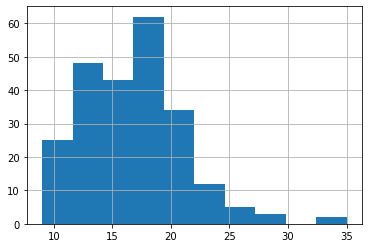

In [22]:
mpg['total_mpg'] = (mpg.cty + mpg.hwy) / 2
mpg.info()
mpg.cty.hist()


<AxesSubplot:>

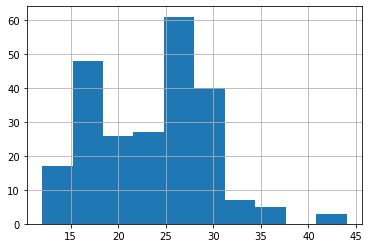

In [23]:
mpg.hwy.hist()


<AxesSubplot:>

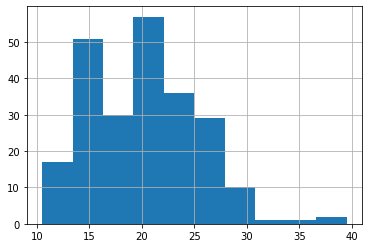

In [31]:
mpg.total_mpg.hist()

In [32]:
h2008 = mpg[mpg.year ==2008].hwy
h1999 = mpg[mpg.year ==1999].cty
c2008 = mpg[mpg.year ==2008].hwy
c1999 = mpg[mpg.year ==1999].cty
t2008 = mpg[mpg.year ==2008].total_mpg
t1999 = mpg[mpg.year ==1999].total_mpg
α=0.05

In [62]:
t, p = stats.ttest_ind(h2008, h1999, equal_var = False)
t, p 

(9.466618497423587, 5.10782454698565e-18)

In [36]:
if (p/2 < α) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


In [61]:
t, p = stats.ttest_ind(c2008, c1999, equal_var = True)
t, p 

(9.466618497423585, 3.4421244174046716e-18)

In [39]:
if (p/2 < α) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


In [60]:
t, p = stats.ttest_ind(t2008, t1999, equal_var = False)
t, p

(-0.21960177245940962, 0.8263750772060638)

In [43]:
if (p/2 < α) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


### Are compact cars more fuel-efficient than the average car?

In [57]:
#Ho compact cars are not more fuel-efficient than average car.
#Ha - compact cars are more fuel-efficient than aveage car
mpg['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [70]:
compact_t = mpg[mpg['class']=='compact'].total_mpg
compact_h = mpg[mpg['class']=='compact'].hwy
compact_c = mpg[mpg['class']=='compact'].cty

(<seaborn.axisgrid.FacetGrid at 0x13fcee070>,
 <seaborn.axisgrid.FacetGrid at 0x159e3f130>)

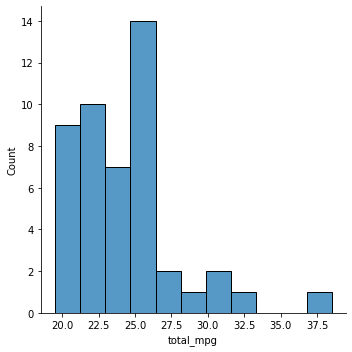

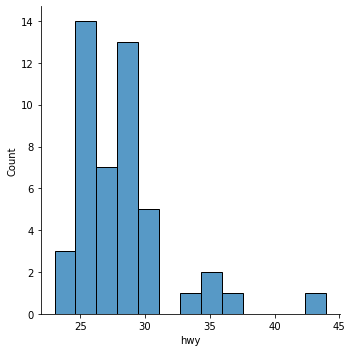

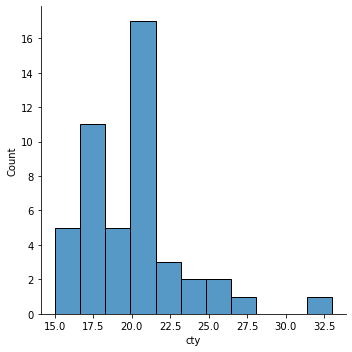

In [73]:
sns.displot(compact_t), sns.displot(compact_h), sns.displot(compact_c)

In [74]:
t,p=stats.ttest_1samp(compact_t,mpg.total_mpg.mean())
t,p

(7.896888573132535, 4.1985637943171186e-10)

In [75]:
if p/2 > α:
    print("We reject the null hypothesis")
elif t < 0 :
    print("We reject the null hypothesis for t-value")
else: 
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


In [76]:
t,p=stats.ttest_1samp(compact_h,mpg.total_mpg.mean())
t,p
if p/2 > α:
    print("We reject the null hypothesis")
elif t < 0 :
    print("We reject the null hypothesis for t-value")
else: 
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


In [77]:
t,p=stats.ttest_1samp(compact_c,mpg.total_mpg.mean())
t,p
if p/2 > α:
    print("We reject the null hypothesis")
elif t < 0 :
    print("We reject the null hypothesis for t-value")
else: 
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


### Do manual cars get better gas mileage than automatic cars?

In [82]:
# Ho - manual caras get the same milage than automatic cars
# Ha - manual cars do get better gas mileage than authomatic cars
mpg['trans'].value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [86]:
manuals = mpg[mpg['trans'].astype(str).str[0] =='m'].total_mpg
auto  = mpg[mpg['trans'].astype(str).str[0] =='a'].total_mpg
auto.count()

157

In [87]:
manuals.count()

77

(<seaborn.axisgrid.FacetGrid at 0x159fc2fa0>,
 <seaborn.axisgrid.FacetGrid at 0x158966760>)

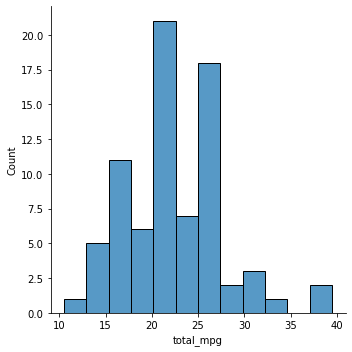

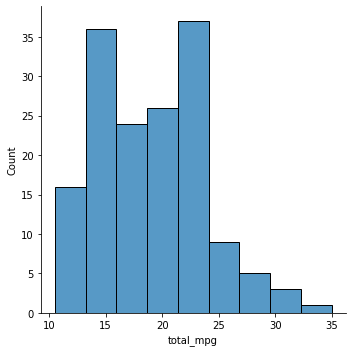

In [88]:
sns.displot(manuals), sns.displot(auto)

In [89]:
manuals.var(), auto.var()

(26.635167464114826, 21.942777233382337)

In [90]:
stats.levene(manuals, auto)

LeveneResult(statistic=0.20075824847529639, pvalue=0.6545276355131857)

In [91]:
stats.ttest_ind(manuals, auto)

Ttest_indResult(statistic=4.593437735750014, pvalue=7.154374401145685e-06)

In [92]:
if p/2 > α:
    print("We reject the null hypothesis")
elif t < 0 :
    print("We reject the null hypothesis for t-value")
else: 
    print("We fail to reject the null hypothesis")

We reject the null hypothesis
